In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly
import squarify
import plotly.graph_objs as go 
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing  import OneHotEncoder
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv("Customer-Churn-Records (1).csv")

In [3]:
data.shape

(10000, 18)

In [4]:
data.isnull().any()

RowNumber             False
CustomerId            False
Surname               False
CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Card Type             False
Point Earned          False
dtype: bool

In [5]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


In [6]:
col_name=data.columns
for i in data.columns:
    print ("number of unique :{}\n{}\n uniquevalues \n{}".format(i,data[i].nunique(),data[i].unique()))
    print ("---------------------- \n")

number of unique :RowNumber
10000
 uniquevalues 
[    1     2     3 ...  9998  9999 10000]
---------------------- 

number of unique :CustomerId
10000
 uniquevalues 
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
---------------------- 

number of unique :Surname
2932
 uniquevalues 
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
---------------------- 

number of unique :CreditScore
460
 uniquevalues 
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 

In [7]:
unq=data[['RowNumber','CustomerId']]
data=data.drop(['RowNumber','CustomerId','Complain'], axis =1)

In [8]:
data_cat=data.select_dtypes(include=['object'])
data_numerical=data.select_dtypes(exclude=['object'])
for i in data_numerical.columns:
          if data_numerical[i].nunique()<15:
            data_cat[i]= data_numerical[i]
            data_numerical=data_numerical.drop(i,axis=1)
print(data_cat)
data_cat.columns


        Surname Geography  Gender Card Type  Tenure  NumOfProducts  HasCrCard  \
0      Hargrave    France  Female   DIAMOND       2              1          1   
1          Hill     Spain  Female   DIAMOND       1              1          0   
2          Onio    France  Female   DIAMOND       8              3          1   
3          Boni    France  Female      GOLD       1              2          0   
4      Mitchell     Spain  Female      GOLD       2              1          1   
...         ...       ...     ...       ...     ...            ...        ...   
9995   Obijiaku    France    Male   DIAMOND       5              2          1   
9996  Johnstone    France    Male  PLATINUM      10              1          1   
9997        Liu    France  Female    SILVER       7              1          0   
9998  Sabbatini   Germany    Male      GOLD       3              2          1   
9999     Walker    France  Female   DIAMOND       4              1          1   

      IsActiveMember  Exite

Index(['Surname', 'Geography', 'Gender', 'Card Type', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited',
       'Satisfaction Score'],
      dtype='object')

In [9]:
data_numerical.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned'], dtype='object')

In [10]:
encoder=LabelEncoder()
data['Surname']=encoder.fit_transform(data['Surname'])


In [11]:
col=data_cat.columns.drop(['Surname','Exited'])
col

Index(['Geography', 'Gender', 'Card Type', 'Tenure', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Satisfaction Score'],
      dtype='object')

In [12]:
x=data.columns.drop(col)
dataset=pd.DataFrame()
dataset[x]=data[x]
x

Index(['Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited',
       'Point Earned'],
      dtype='object')

In [13]:
##one hot encoading 
for i in data[col]:
    j=pd.get_dummies(data=data[i],drop_first=True,prefix='cata{}'.format(i),prefix_sep='_')
    dataset=pd.concat([dataset,j],axis=1)



In [14]:
dataset

,Surname,CreditScore,Age,Balance,EstimatedSalary,Exited,Point Earned,cataGeography_Germany,cataGeography_Spain,cataGender_Male,...,cataTenure_10,cataNumOfProducts_2,cataNumOfProducts_3,cataNumOfProducts_4,cataHasCrCard_1,cataIsActiveMember_1,cataSatisfaction Score_2,cataSatisfaction Score_3,cataSatisfaction Score_4,cataSatisfaction Score_5
0,1115,619,42,0.00,101348.88,1,464,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,1177,608,41,83807.86,112542.58,0,456,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2040,502,42,159660.80,113931.57,1,377,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,289,699,39,0.00,93826.63,0,350,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1822,850,43,125510.82,79084.10,0,425,0,1,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1999,771,39,0.00,96270.64,0,300,0,0,1,...,0,1,0,0,1,0,0,0,0,0
9996,1336,516,35,57369.61,101699.77,0,771,0,0,1,...,1,0,0,0,1,1,0,0,0,1
9997,1570,709,36,0.00,42085.58,1,564,0,0,0,...,0,0,0,0,0,1,0,1,0,0
9998,2345,772,42,75075.31,92888.52,1,339,1,0,1,...,0,1,0,0,1,0,1,0,0,0


In [15]:
dataset.shape

(10000, 32)

In [16]:
dataset.columns

Index(['Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited',
       'Point Earned', 'cataGeography_Germany', 'cataGeography_Spain',
       'cataGender_Male', 'cataCard Type_GOLD', 'cataCard Type_PLATINUM',
       'cataCard Type_SILVER', 'cataTenure_1', 'cataTenure_2', 'cataTenure_3',
       'cataTenure_4', 'cataTenure_5', 'cataTenure_6', 'cataTenure_7',
       'cataTenure_8', 'cataTenure_9', 'cataTenure_10', 'cataNumOfProducts_2',
       'cataNumOfProducts_3', 'cataNumOfProducts_4', 'cataHasCrCard_1',
       'cataIsActiveMember_1', 'cataSatisfaction Score_2',
       'cataSatisfaction Score_3', 'cataSatisfaction Score_4',
       'cataSatisfaction Score_5'],
      dtype='object')

In [17]:
dataset['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
## model selection 
## train test split 
train,test=train_test_split(dataset,test_size=0.25,random_state=55)

In [19]:
#confusion matrix 
def evalmat(truevalue,predict):
    cm=confusion_matrix(truevalue,predict)
    print(cm)
    tn=cm[0,0]
    fp=cm[0,1]
    fn=cm[1,0]
    tp=cm[1,1]
    #Sensitivity/ Recall/ True Positive Rate = TP / [TP + FN]
    recall=tp/[tp/fn]
    #Specificity/TNR = TN / [TN + FP]
    specificity=tn/(tn+fp)
   #Accuracy = [TP + TN] / [TP + FN + FP + TN]
    accuracy= (tp + tn) / (tp + fn + fp + tn)
    #Precision = TP / [TP + FP]
    Precision = tp / (tp + fp)
    #F1-Score = [2 x Precision x Recall] / [Precision + Recall]
    F1_Score = (2*Precision*recall) /(Precision + recall)
    print('recall=',recall,'\n')
    print('specificity=',specificity,'\n','accuracy=',accuracy,'\n','Precision=',Precision,'\n')
    print('F1_Score =',F1_Score,'\n')

In [20]:
## logistic regression default
train,test=train_test_split(dataset,test_size=0.25,random_state=55)
Y_train= train.pop('Exited')
Y_test=test.pop('Exited')

In [21]:
modellr=LogisticRegression()
modellr.fit(train,Y_train)

LogisticRegression()

In [22]:
modellr_train_pred=modellr.predict(train)
modellr_test_pred=modellr.predict(test)
print('train evelution metrics\n')
evalmat(Y_train,modellr_train_pred)
print('test evelution metrics\n')
evalmat(Y_test,modellr_test_pred)

train evelution metrics

[[5844  133]
 [1448   75]]
recall= [1448.] 

specificity= 0.9777480341308349 
 accuracy= 0.7892 
 Precision= 0.3605769230769231 

F1_Score = [0.72097431] 

test evelution metrics

[[1940   45]
 [ 485   30]]
recall= [485.] 

specificity= 0.9773299748110831 
 accuracy= 0.788 
 Precision= 0.4 

F1_Score = [0.79934075] 



In [23]:
## logistic regression default
train,test=train_test_split(dataset,test_size=0.2,random_state=55)
scaler=MinMaxScaler()
train[train.columns]=scaler.fit_transform(train[train.columns])

In [24]:
Y_train= train.pop('Exited')
Y_test=test.pop('Exited')

In [25]:
## rfe 12 is giving more accuracy  than default 

modellr=LogisticRegression()

rfe=RFE(modellr,n_features_to_select=12)
rfe.fit(train,Y_train)
names=train.columns.tolist()
b=rfe.ranking_
a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])
RFE_selected=a['features'][a['rank']==1]
RFE_selected
train=train[RFE_selected]
test=test[RFE_selected]
modellr=modellr.fit(train,Y_train)
lr_train_pred=modellr.predict(train)
lr_test_pred=modellr.predict(test)
print('train evelution metrics\n')
evalmat(Y_train,lr_train_pred)
print('test evelution metrics\n')
evalmat(Y_test,lr_test_pred)

train evelution metrics

[[6113  251]
 [1037  599]]
recall= [1037.] 

specificity= 0.9605593966059083 
 accuracy= 0.839 
 Precision= 0.7047058823529412 

F1_Score = [1.40845463] 

test evelution metrics

[[1580   18]
 [ 395    7]]
recall= [395.] 

specificity= 0.9887359198998749 
 accuracy= 0.7935 
 Precision= 0.28 

F1_Score = [0.55960332] 



In [26]:
RFE_selected

0                       Age
1                   Balance
2               CreditScore
3              Point Earned
4           cataGender_Male
5     cataGeography_Germany
6      cataIsActiveMember_1
7       cataNumOfProducts_2
8       cataNumOfProducts_3
9       cataNumOfProducts_4
10             cataTenure_1
11             cataTenure_7
Name: features, dtype: object

In [27]:
# hyper parameters of logistic regression are 
train.isnull().any()

Age                      False
Balance                  False
CreditScore              False
Point Earned             False
cataGender_Male          False
cataGeography_Germany    False
cataIsActiveMember_1     False
cataNumOfProducts_2      False
cataNumOfProducts_3      False
cataNumOfProducts_4      False
cataTenure_1             False
cataTenure_7             False
dtype: bool

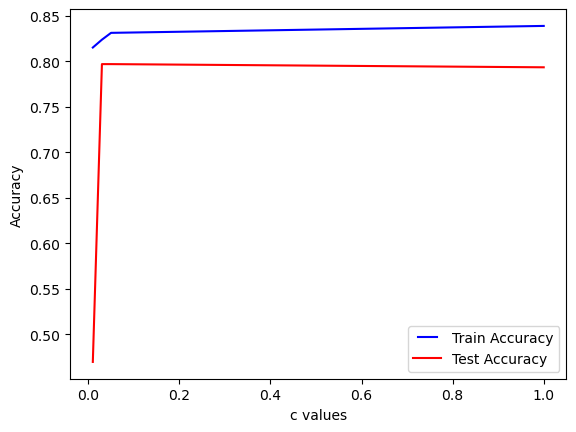

In [28]:
## hyper parameter tuning  framing the grid search cv 


    #'penalty': ['l1', 'l2'],

max_depths =[0.01,0.03,0.05,1]

#linspace generates the samples 
train_results = []
test_results = []
for i in max_depths:
    modellr=LogisticRegression(C=i)
    modellr.fit(train,Y_train)

    train_pred = modellr.predict(train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modellr.predict(test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('c values')
plt.show()



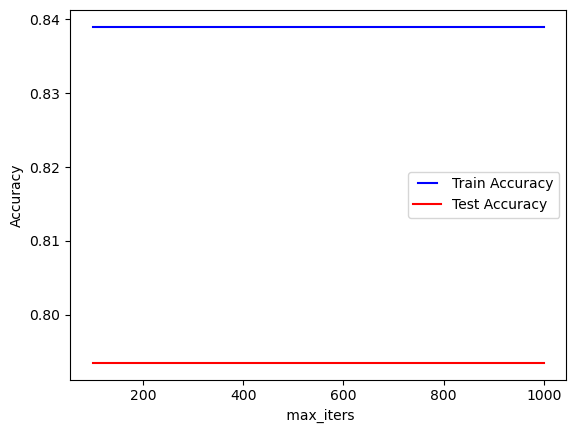

In [29]:
max_iters= [100,500, 600, 1000,]


#linspace generates the samples 
train_results = []
test_results = []
for i in max_iters:
    modellr=LogisticRegression(max_iter=i)
    modellr.fit(train,Y_train)

    train_pred = modellr.predict(train)
    confusion_matrix_train = confusion_matrix(Y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = modellr.predict(test)
    confusion_matrix_test = confusion_matrix(Y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_iters, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_iters, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel(' max_iters')
plt.show()



In [30]:
param_grid = {
    'penalty': ['l1','l2'],
    'C': [0.01, 0.03, 0.04, 1],
    'solver': ['liblinear', 'saga','lbfgs'],
    'max_iter': [500, 600, 1000],
    'fit_intercept': [True, False],
    'class_weight': ['balanced'],
    'tol': [1e-4, 1e-3, 1e-2]
}


In [31]:
modellr=LogisticRegression()

rfe=RFE(modellr,n_features_to_select=12)
rfe.fit(train,Y_train)
names=train.columns.tolist()
b=rfe.ranking_
a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])
RFE_selected=a['features'][a['rank']==1]
RFE_selected
train=train[RFE_selected]
test=test[RFE_selected]

model=GridSearchCV(modellr,param_grid,cv=3)

In [32]:
model.fit(train,Y_train)

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


216 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'non

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.03, 0.04, 1],
                         'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [500, 600, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs'],
                         'tol': [0.0001, 0.001, 0.01]})

In [33]:
model.best_estimator_

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='saga', tol=0.01)

In [34]:
train_pred = model.predict(train)
test_pred = model.predict(test)

print('train evelution metrics\n')
evalmat(Y_train,train_pred)
print('test evelution metrics\n')
evalmat(Y_test,test_pred)

train evelution metrics

[[4892 1472]
 [ 407 1229]]
recall= [407.] 

specificity= 0.7686989314896292 
 accuracy= 0.765125 
 Precision= 0.45501666049611256 

F1_Score = [0.90901706] 

test evelution metrics

[[1580   18]
 [ 394    8]]
recall= [394.] 

specificity= 0.9887359198998749 
 accuracy= 0.794 
 Precision= 0.3076923076923077 

F1_Score = [0.61490441] 



In [35]:

# rfi=model.best_estimator_.feature_importances_
# pd.Series(rfi).nunique()
# feature_importances=pd.DataFrame({'index':train.columns,'values':rfi})
# feature_importances=feature_importances.sort_values(by='values',ascending=False)
# feature_importances
# plt.title('Feature Importances')
# plt.barh(feature_importances['index'], feature_importances['values'], color='blue')
# plt.yticks(feature_importances['index'])
# plt.xlabel('Relative Importance for default model after rfe')
# plt.show()

In [36]:
def get_predictions(x_train,y_train):
    y_train_proba = pd.DataFrame({'Exited':y_train.values,
                                  'Exited_Prob':model.predict_proba(x_train)[:,1]})
    y_train_proba['Cust_ID'] = y_train.index
    y_train_proba = y_train_proba.reindex(['Cust_ID','Exited','Exited_Prob'], axis=1)
    y_train_proba['predicted'] = y_train_proba.Exited_Prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_proba
    
   

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show

    return None

train
   Cust_ID  Exited  Exited_Prob  predicted
0     9809     1.0     0.635442          1
1     1740     0.0     0.659008          1
2      412     0.0     0.276892          0
3     9994     0.0     0.175523          0
4     6966     0.0     0.029899          0
test
   Cust_ID  Exited    Exited_Prob  predicted
0     2082       0   9.377464e-71          0
1      679       0  3.419213e-103          0
2     2751       0   0.000000e+00          0
3     3295       0  6.339318e-164          0
4     5392       1   8.151723e-66          0
[[4892 1472]
 [ 407 1229]]
recall= [407.] 

specificity= 0.7686989314896292 
 accuracy= 0.765125 
 Precision= 0.45501666049611256 

F1_Score = [0.90901706] 

test_proba mertrics
[[1580   18]
 [ 394    8]]
recall= [394.] 

specificity= 0.9887359198998749 
 accuracy= 0.794 
 Precision= 0.3076923076923077 

F1_Score = [0.61490441] 



,Cust_ID,Exited,Exited_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,9809,1.0,0.635442,1,1,1,1,1,1,1,1,0,0,0
1,1740,0.0,0.659008,1,1,1,1,1,1,1,1,0,0,0
2,412,0.0,0.276892,0,1,1,1,0,0,0,0,0,0,0
3,9994,0.0,0.175523,0,1,1,0,0,0,0,0,0,0,0
4,6966,0.0,0.029899,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5488,0.0,0.354890,0,1,1,1,1,0,0,0,0,0,0
7996,6198,0.0,0.405187,0,1,1,1,1,1,0,0,0,0,0
7997,8865,0.0,0.520445,1,1,1,1,1,1,1,0,0,0,0
7998,968,0.0,0.495263,0,1,1,1,1,1,0,0,0,0,0


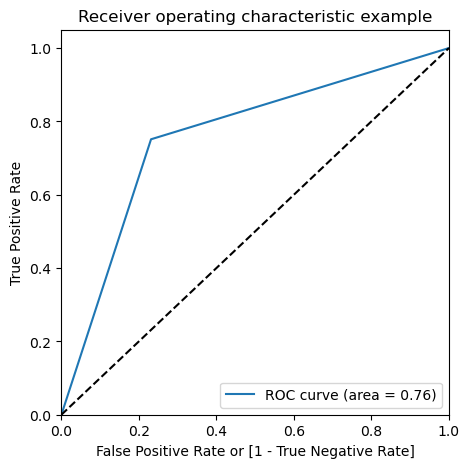

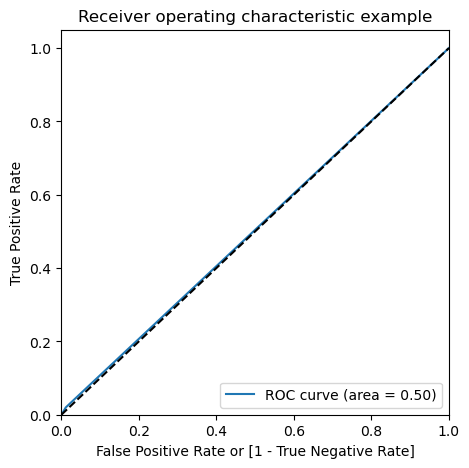

In [37]:
y_train_proba=get_predictions(train,Y_train)    
y_test_proba=get_predictions(test,Y_test) 
print('train')
print(y_train_proba.head())
draw_roc(Y_train,y_train_proba['predicted'])
print('test')
print(y_test_proba.head())
draw_roc(Y_test,y_test_proba['predicted'])

evalmat(Y_train,y_train_proba.predicted)
print('test_proba mertrics')
evalmat(Y_test,y_test_proba.predicted)

for i in range(10):
        y_train_proba[i/10] = y_train_proba.Exited_Prob.map(lambda x: 1 if x > i/10 else 0)


y_train_proba

In [38]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_proba.Exited, y_train_proba[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     threshold  accuracy     sensi     speci
0.0        0.0  0.204500  1.000000  0.000000
0.1        0.1  0.314500  0.987164  0.141578
0.2        0.2  0.471875  0.949878  0.348994
0.3        0.3  0.601250  0.896088  0.525456
0.4        0.4  0.695375  0.830073  0.660748
0.5        0.5  0.765125  0.751222  0.768699
0.6        0.6  0.805250  0.635697  0.848837
0.7        0.7  0.830000  0.502445  0.914205
0.8        0.8  0.836500  0.358802  0.959302
0.9        0.9  0.824500  0.185208  0.988843


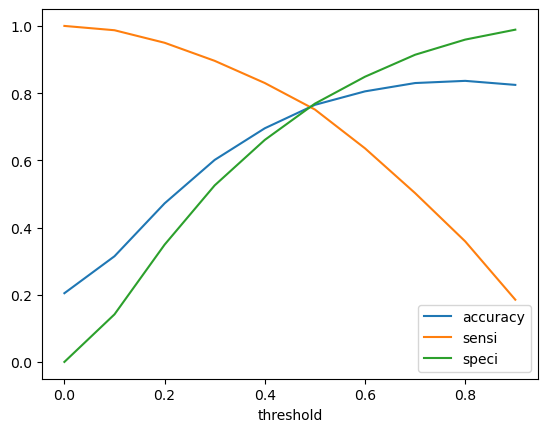

In [39]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensi','speci'])
plt.show()

In [42]:
y_train_proba['final_predicted'] = y_train_proba.Exited_Prob.map( lambda x: 1 if x > 0.55 else 0)
y_train_proba.head()
y_test_proba['final_predicted'] = y_test_proba.Exited_Prob.map( lambda x: 1 if x > 0.55 else 0)
evalmat(Y_train,y_train_proba['final_predicted'])
evalmat(Y_test,y_test_proba['final_predicted'])

[[5175 1189]
 [ 485 1151]]
recall= [485.] 

specificity= 0.8131678189817725 
 accuracy= 0.79075 
 Precision= 0.49188034188034185 

F1_Score = [0.98276398] 

[[1580   18]
 [ 394    8]]
recall= [394.] 

specificity= 0.9887359198998749 
 accuracy= 0.794 
 Precision= 0.3076923076923077 

F1_Score = [0.61490441] 

